In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the country reference file
df_countries = pd.read_csv("CT_COUNTRIES.csv", sep=";", header=None, names=["code", "lang", "name"])

country_dict = df_countries.set_index("code")["name"].to_dict()

In [ ]:
import io

FILE_PATH     = "EXPORT_DATA_envoi_01_01_2022_30_04_2025.csv"
TARGET_BYTES  = 1 * 1024**3          # ≈1 GB
ENCODING      = "utf-8-sig"          # handles UTF-8 + BOM

def load_gb_chunk(path, chunk_index=0, target_bytes=TARGET_BYTES, **read_kwargs):
    """
    Load the N-th ≈1 GB chunk (0-based) from a large CSV.

    Parameters
    ----------
    path : str
        CSV file path.
    chunk_index : int
        0 for the first gigabyte, 1 for the second, and so on.
    target_bytes : int
        Approximate raw size for each chunk (defaults to 1 GB).

    Returns
    -------
    pandas.DataFrame
        The requested slice as a DataFrame.
    """
    with open(path, "rb") as f:
        header = f.readline()            # capture header once

        # -------- skip over the earlier chunks --------
        for _ in range(chunk_index):
            skipped = 0
            while skipped < target_bytes:
                line = f.readline()
                if not line:             # hit EOF too soon
                    raise ValueError("chunk_index beyond end of file")
                skipped += len(line)

        # -------- collect the requested chunk --------
        buffers      = [header]
        bytes_so_far = len(header)

        while bytes_so_far < target_bytes:
            line = f.readline()
            if not line:                 # EOF
                break
            bytes_so_far += len(line)
            buffers.append(line)

    pseudo_file = io.BytesIO(b"".join(buffers))

    df = pd.read_csv(
        pseudo_file,
        sep=";",
        encoding=ENCODING,
        on_bad_lines="skip",
        dtype=str,
        low_memory=False,
        **read_kwargs,
    )

    # strip any stray BOM from the first column name
    df.columns = df.columns.str.lstrip("\ufeff")
    return df

# -------- examples --------
df = load_gb_chunk(FILE_PATH, chunk_index=4)  # second GB

print("Fifth:", df.shape)


Fifth: (7872903, 7)


In [4]:
first_row_df = df.head(1)   # first_row_df.shape == (1, df.shape[1])
first_row_df

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
0,SGSINBDZALGDAUR30443003010126,RB268533578SG,Recevoir envoi au bureau de livraison (Ent),2023-04-17 11:24:29.377,MAHELMA,32,NaN


In [5]:
last_row_df  = df.tail(1)   # last_row_df.shape  == (1, df.shape[1])
last_row_df

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
7872902,SGSINBDZALGDAUR40117004010086,RB329312970SG,Recevoir envoi au bureau de livraison (Ent),2024-02-04 08:03:47.200,ANNABA EL MARSA,32,NaN


In [6]:
distinct_values_count = df.nunique()

distinct_values_count = distinct_values_count.sort_values(ascending=True)

print(distinct_values_count)

EVENT_TYPE_NM                     21
EVENT_TYPE_CD                     21
next_établissement_postal       3464
établissement_postal            3586
RECPTCL_FID                    58070
MAILITM_FID                  1746608
date                         7708841
dtype: int64


In [7]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

next_établissement_postal    5074477
dtype: int64


In [8]:

# Assuming 'df' is your DataFrame!

# Identify the rows with missing values
missing_rows = df[df.isnull().any(axis=1)]

# Print the total number of rows that have missing values
print("Total rows with missing values:", missing_rows.shape[0])




Total rows with missing values: 5074477


In [9]:
# Analyze the missing patterns across rows:
# Create a binary pattern for each row where 1 indicates a missing value and 0 indicates non-missing.
missing_pattern = missing_rows.isnull().astype(int)
# Convert each pattern to a tuple to use as a key for groupby
missing_pattern_tuples = missing_pattern.apply(tuple, axis=1)
# Group by the missing pattern and count the number of rows for each pattern
pattern_summary = missing_rows.groupby(missing_pattern_tuples).size().sort_values(ascending=False)

print("\nSummary of missing patterns (tuple of 0's and 1's corresponding to missing values in each column):")
print(pattern_summary)




Summary of missing patterns (tuple of 0's and 1's corresponding to missing values in each column):
(0, 0, 0, 0, 0, 0, 1)    5074477
dtype: int64


In [11]:
unique_vals = df['next_établissement_postal'].dropna().unique()
for v in unique_vals:
    print(repr(v))

'SECTION PAQUETS CPX ALGER'
'CDD BEJAIA'
'SIDI-AICH'
'TIBANE'
'CTR BISKRA'
'MEGLOUB'
'CDD KOUBA'
'ALGER GARE'
'CDD TIPAZA'
'CHERCHELL'
'ANNABA EL MARSA'
'OULED-HABEBA'
'BOUFARIK CITE DU STADE'
'ES-SENIA'
'CDD AIN DEFLA'
'CDD SETIF'
'TIGHENNIF'
'CDD BOUMERDES FRANTZ FANON'
'BORDJ MENAEIL'
'CDD BATNA'
'TASSADANE'
'HADJOUT'
'TIZI ANNAN'
'CDD BENAKNOUN'
'EL BIAR BOUGARA'
'CDD MSILA'
'M SILA-CHEBILIA'
'SIDI AMMAR'
'CDD SIDI BELABES'
'CDD BOUIRA'
'SOUR EL GHOZLANE'
'CTR MEDEA'
'BOURROUAGHIA 1ER NOV'
'REGHAIA'
'CDD LAGHOUAT'
'LAGHOUAT-EMIR-AEK (GARE ROUTIERE)'
'SIDI YACINE'
'ORAN COLIS POSTAUX'
'CDD DJELFA'
'DJELFA 5 JUILLET'
'NEDROMA'
'NEDROMA ABDEL MOUMEN'
'BAB EZZOUAR EL ALIA'
'CONSTANTINE COLIS POSTAUX'
'BATNA ENNASR'
'TAHIR'
'BENI SLIMANE'
'SAOULA'
'CDD SKIKDA'
'AIN-KECHERA'
'CDD MOSTAGHANEM'
'BORDJ EL KIFFAN'
'CDD TLEMCEN'
'CTR BECHAR'
'ROSTOMIA'
'BOUHADJAR'
'Z MALET-EL-EMIR-AEK'
'CDD BBA'
'LAKHDARIA'
'EL-OULDJA-BOULBALOUT'
'JIJEL-NIBOUCHE'
'HAMMOUDI-HAMROUCHE'
'CDD-ALGER-MALIKA-GAID'
'

EVENT_TYPE_NM
Recevoir envoi au bureau de livraison (Ent)                    1890479
Expédier envoi à adresse nationale (Ent)                       1583609
Expédier envoi à adresse nationale (Srt)                       1197465
Recevoir envoi au bureau d'échange (Ent)                        915100
Livraison d'envoi (Ent)                                         819326
Vaine tentative de livraison d'envoi (Ent)                      798565
Transmettre envoi à l'agent de livraison (Ent)                  498660
Enregistrer détails d'envoi au bureau d'échange (Srt)           125009
Expédier envoi à la douane (Ent)                                 14522
Insérer envoi dans sac (Srt)                                     12934
Recevoir envoi au bureau d'échange (Srt)                         10299
Renvoyer envoi de la douane (Ent)                                 5050
Renvoyer envoi de la douane (Srt)                                  752
Enregistrer raison de rétention d'envoi par la douane (Srt)    

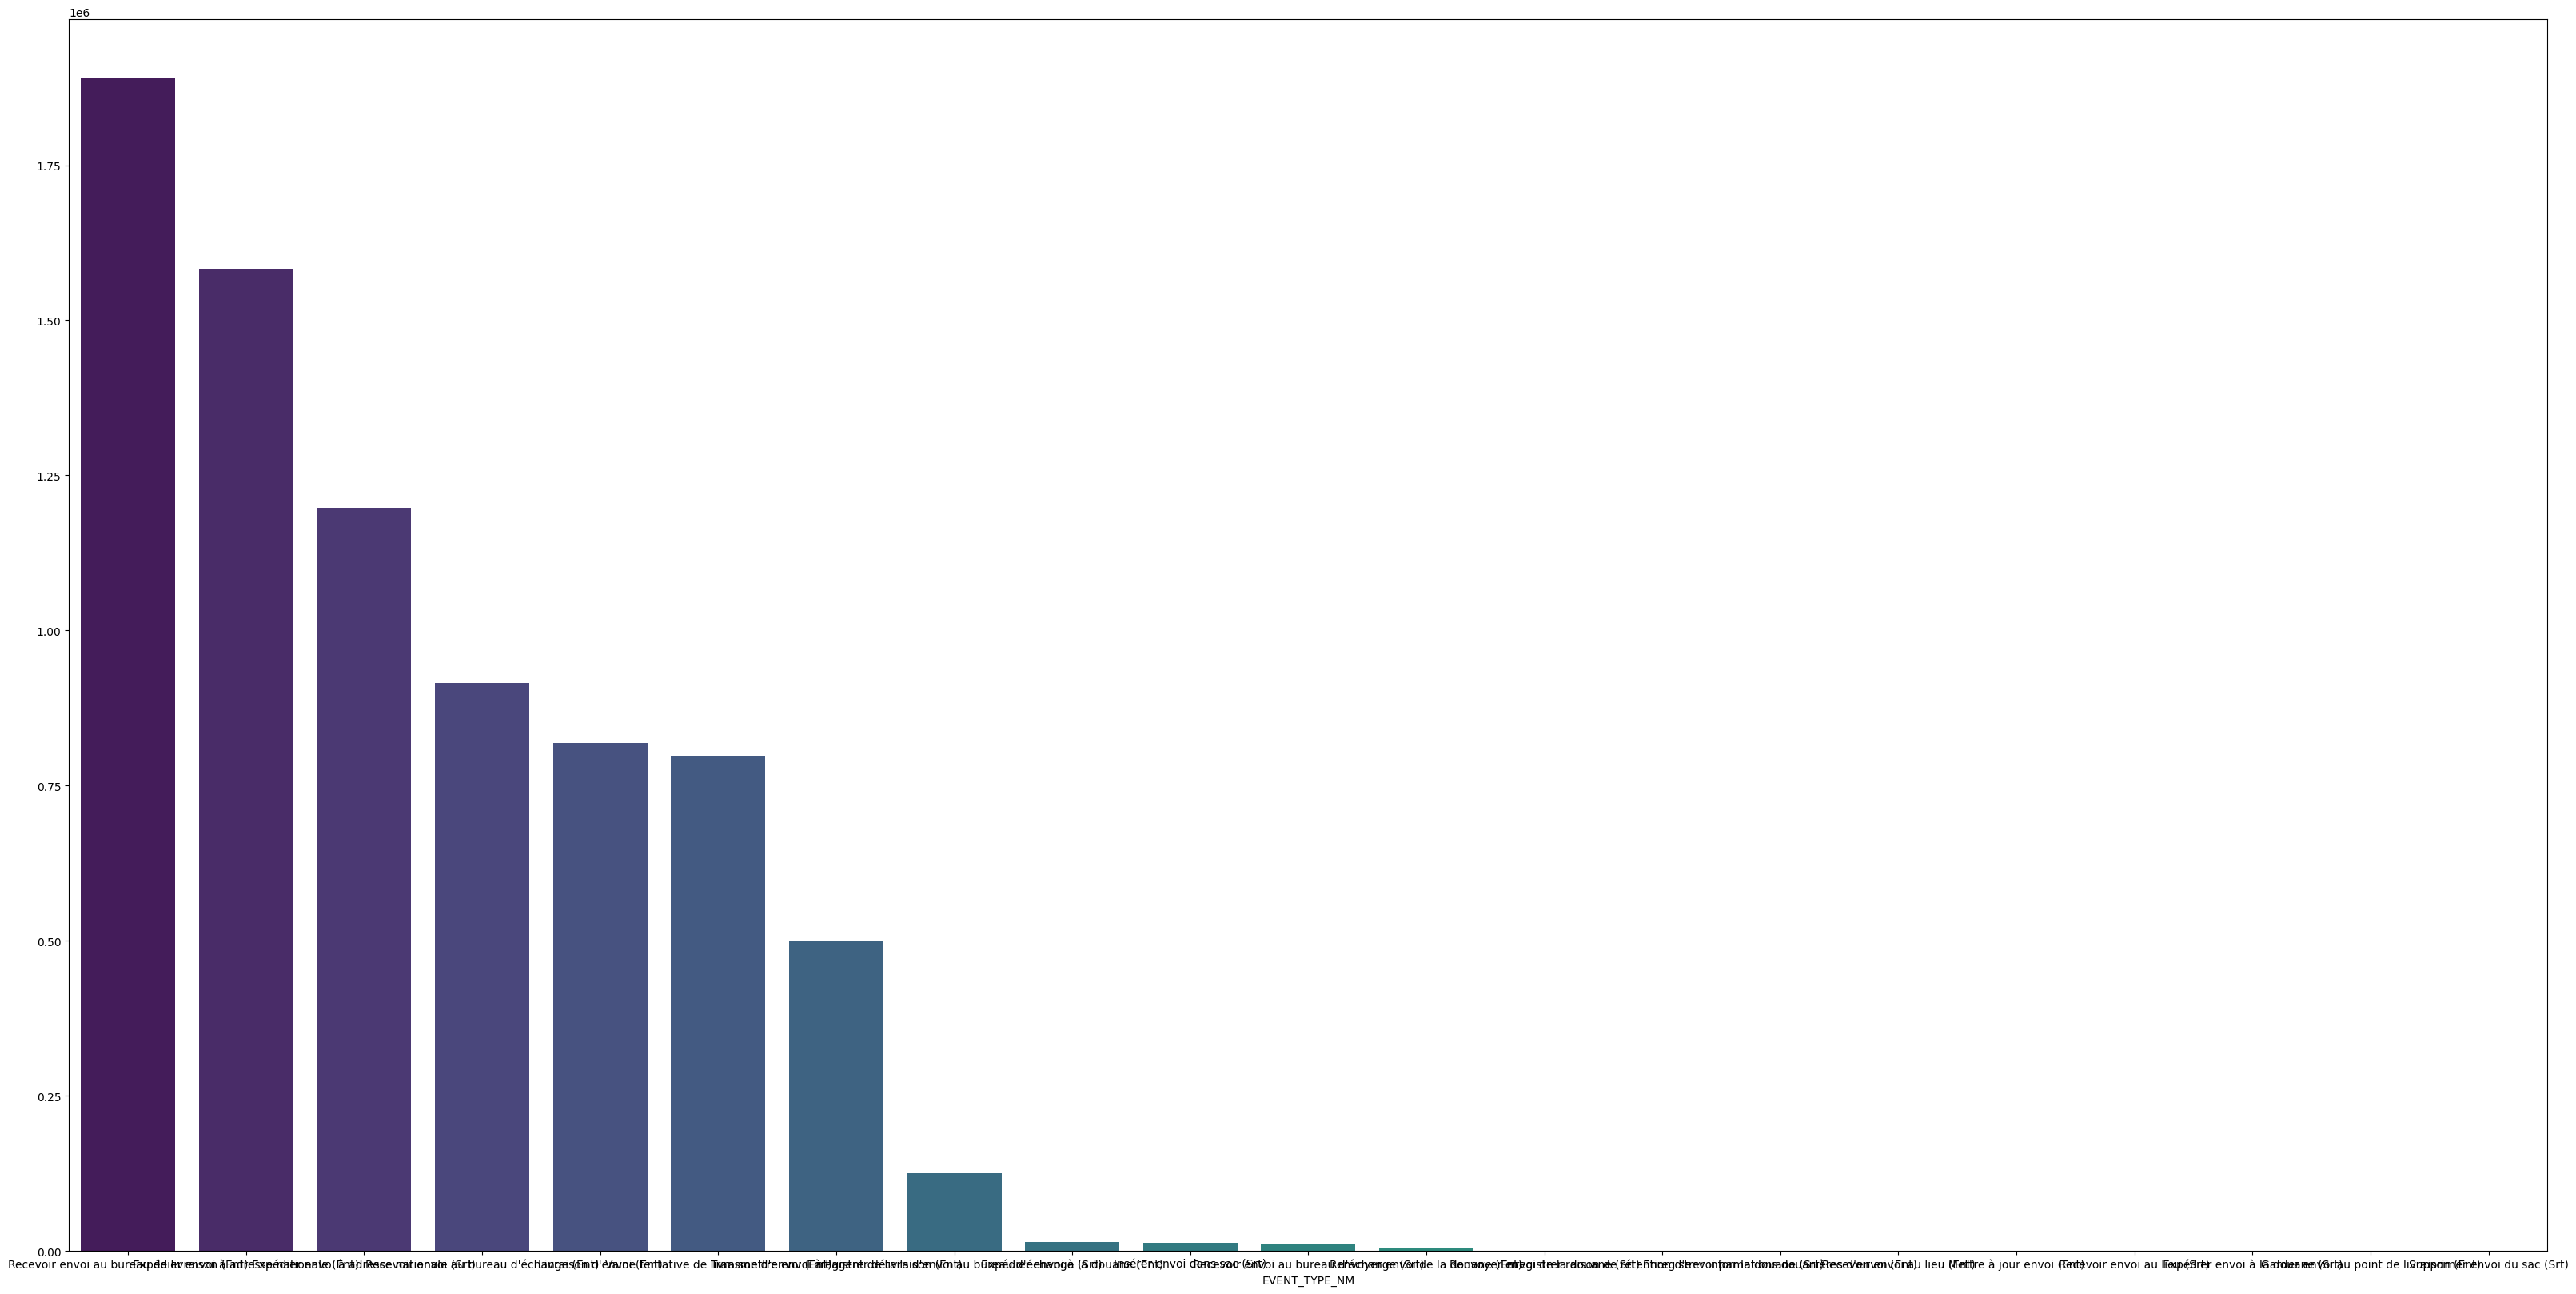

In [12]:

# Count the occurrences of each protocol
event_type = df['EVENT_TYPE_NM'].value_counts()

print(event_type)

# Visualize the counts of each protocol
plt.figure(figsize=(40, 20))
sns.barplot(x=event_type.index, y=event_type.values, palette='viridis')
plt.show()

In [13]:

# Count the occurrences of each protocol
proto_counts = df['établissement_postal'].value_counts()

print(proto_counts)


établissement_postal
ALGER GARE                   1358987
ALGER COLIS POSTAUX          1102485
CONSTANTINE COLIS POSTAUX     378569
ANNABA EL MARSA               251320
CTR CHLEF                     167965
                              ...   
BEL-BACHIR                         1
BICHER                             1
OULED EL KHEMIS                    1
AISSAOUI-BOUZIANE                  1
THILIDJENE                         1
Name: count, Length: 3586, dtype: int64


In [14]:
# Count the occurrences of each protocol
proto_counts = df['next_établissement_postal'].value_counts()

print(proto_counts)



next_établissement_postal
ALGER GARE                   320623
SECTION PAQUETS CPX ALGER    308212
CONSTANTINE COLIS POSTAUX    146243
ORAN COLIS POSTAUX           136588
ANNABA EL MARSA              119121
                              ...  
BOUDJEBAA-EL-BORDJ                1
SILA                              1
EL-GOUEA                          1
OUM-EL-BOUAGHI-EPI-1              1
TEBERBERT                         1
Name: count, Length: 3464, dtype: int64


In [15]:
# Rows whose RECPTCL_FID is not NaN
rec_present = df[df["RECPTCL_FID"].notna()]

# Show the first five
rec_present.head()


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
0,SGSINBDZALGDAUR30443003010126,RB268533578SG,Recevoir envoi au bureau de livraison (Ent),2023-04-17 11:24:29.377,MAHELMA,32,NaN
1,SGSINBDZALGDAUR30443003010126,RB268533578SG,Recevoir envoi au bureau de livraison (Ent),2023-04-25 10:18:41.977,ZAATRIA,32,NaN
2,SGSINBDZALGDAUR30443003010126,RB268533578SG,Recevoir envoi au bureau d'échange (Ent),2023-04-15 09:21:47.327,ALGER GARE,30,NaN
3,SGSINBDZALGDAUR30443003010126,RB268533578SG,Recevoir envoi au bureau d'échange (Ent),2023-04-16 10:32:20.023,ALGER GARE,30,NaN
4,SGSINBDZALGDAUR30443003010126,RB268572885SG,Expédier envoi à adresse nationale (Ent),2023-04-15 10:06:13.363,ALGER GARE,35,SECTION PAQUETS CPX ALGER


In [16]:
# 1️⃣  Make sure the column is treated as text (protects against NaNs)
fid = df["MAILITM_FID"].astype("string")

# 2️⃣  Boolean mask: True if both trailing characters are letters (A-Z / a-z)
two_letter_suffix = fid.str[-2:].str.isalpha()

# --- Quick sanity check
print(two_letter_suffix.value_counts(dropna=False))
# True  : rows where the code ends in letters (e.g. "ES")
# False : rows where it ends in digits or something else
# <NA>  : rows where MAILITM_FID itself is missing


MAILITM_FID
True    7872903
Name: count, dtype: Int64


In [17]:
bad_suffix = df[~two_letter_suffix & fid.notna()]

print(f"Bad rows: {len(bad_suffix):,}")
bad_suffix.head()   # peek at the first few offenders



Bad rows: 0


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal


In [13]:
# Build the “good suffix” mask once
suffix_ok = (
    df["MAILITM_FID"]
      .astype("string")
      .str[-2:]
      .str.isalpha()
      .fillna(False)          # treat missing IDs as bad
)

df = df[suffix_ok]

# Quick confirmation
print(f"Rows left: {len(df):,}")
df.head()


Rows left: 10,103,602


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
0,NaN,CC021659473ES,Insérer envoi dans sac (Srt),2024-01-31 20:11:00.000,ESPAGNE,8,NaN
1,NaN,CC021662747ES,Réception d'envoi du client (Srt),2024-01-31 12:31:00.000,ESPAGNE,1,NaN
2,NaN,CC021662747ES,Insérer envoi dans sac (Srt),2024-02-05 12:46:00.000,ESPAGNE,8,NaN
3,NaN,CC021663328ES,Réception d'envoi du client (Srt),2024-01-31 13:51:00.000,ESPAGNE,1,NaN
4,NaN,CC021663328ES,Insérer envoi dans sac (Srt),2024-02-01 12:32:00.000,ESPAGNE,8,NaN


In [18]:
df['id'] = df["MAILITM_FID"].str[-2:]
df.head()

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal,id
0,SGSINBDZALGDAUR30443003010126,RB268533578SG,Recevoir envoi au bureau de livraison (Ent),2023-04-17 11:24:29.377,MAHELMA,32,NaN,SG
1,SGSINBDZALGDAUR30443003010126,RB268533578SG,Recevoir envoi au bureau de livraison (Ent),2023-04-25 10:18:41.977,ZAATRIA,32,NaN,SG
2,SGSINBDZALGDAUR30443003010126,RB268533578SG,Recevoir envoi au bureau d'échange (Ent),2023-04-15 09:21:47.327,ALGER GARE,30,NaN,SG
3,SGSINBDZALGDAUR30443003010126,RB268533578SG,Recevoir envoi au bureau d'échange (Ent),2023-04-16 10:32:20.023,ALGER GARE,30,NaN,SG
4,SGSINBDZALGDAUR30443003010126,RB268572885SG,Expédier envoi à adresse nationale (Ent),2023-04-15 10:06:13.363,ALGER GARE,35,SECTION PAQUETS CPX ALGER,SG


In [19]:

# Count the occurrences of each protocol
proto_counts = df['id'].value_counts()

print(proto_counts)

s = proto_counts


id
SG    5529509
NL    1738398
MY     548998
PL      18707
SE       8117
PT       7820
SA       5533
LV       3191
AU       2053
NO       1988
IN       1380
QA        996
PK        952
FR        771
BR        748
IE        657
EE        460
PS        443
OM        433
NZ        386
RU        307
KZ        231
HK        207
DE         81
IQ         69
CL         68
ES         49
FI         43
GB         37
UZ         32
RS         27
CN         23
IT         19
UY         17
VU         16
US         14
ID         14
MX         12
BE         10
TO          9
MA          9
BH          8
PE          8
LU          7
BQ          7
CV          6
SD          5
BF          5
AW          4
HR          3
KI          3
MO          3
JP          3
AO          2
CA          2
AT          2
AL          1
Name: count, dtype: int64


In [20]:
# Map the Series index using the country_dict
s.index = s.index.map(lambda code: country_dict.get(code, code))  # Keep unmapped codes as!!-is
print(s)

id
SINGAPOUR                         5529509
PAYS-BAS                          1738398
MALAISIE                           548998
POLOGNE                             18707
SUÈDE                                8117
PORTUGAL                             7820
ARABIE SAOUDITE                      5533
LETTONIE                             3191
AUSTRALIE                            2053
NORVÈGE                              1988
INDE                                 1380
QATAR                                 996
PAKISTAN                              952
FRANCE                                771
BRÉSIL                                748
IRLANDE                               657
ESTONIE                               460
PALESTINIEN OCCUPÉ, TERRITOIRE        443
OMAN                                  433
NOUVELLE-ZÉLANDE                      386
RUSSIE, FÉDÉRATION DE                 307
KAZAKHSTAN                            231
HONG-KONG                             207
ALLEMAGNE                      

In [21]:
print("Min date:", df["date"].min())
print("Max date:", df["date"].max())

Min date: 2020-02-04 12:55:28.270
Max date: 2025-05-21 16:13:09.427


In [22]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M:%S.%f")
# Sort by ID and date
df = df.sort_values(by=["MAILITM_FID", "date"])

# Calculate time to next step
df["duration_to_next_step"] = df.groupby("MAILITM_FID")["date"].shift(-1) - df["date"]

# Calculate total duration per ID
first_date = df.groupby("MAILITM_FID")["date"].transform("first")
last_date = df.groupby("MAILITM_FID")["date"].transform("last")
df["total_duration"] = last_date - first_date

# Preview the updated dataset
df[["MAILITM_FID", "date", "EVENT_TYPE_NM", "duration_to_next_step", "total_duration"]].head(10)


,MAILITM_FID,date,EVENT_TYPE_NM,duration_to_next_step,total_duration
5112102,CA000340856PK,2023-01-24 08:22:48.080,Recevoir envoi au bureau d'échange (Ent),0 days 01:02:17.647000,0 days 23:14:28.017000
5112101,CA000340856PK,2023-01-24 09:25:05.727,Expédier envoi à adresse nationale (Srt),0 days 09:18:00.073000,0 days 23:14:28.017000
5112100,CA000340856PK,2023-01-24 18:43:05.800,Expédier envoi à adresse nationale (Ent),0 days 12:54:10.297000,0 days 23:14:28.017000
5112103,CA000340856PK,2023-01-25 07:37:16.097,Transmettre envoi à l'agent de livraison (Ent),NaT,0 days 23:14:28.017000
5177590,CA000623155BF,2024-03-30 11:07:23.490,Recevoir envoi au bureau d'échange (Ent),0 days 23:18:43.483000,2 days 22:21:40.983000
5177587,CA000623155BF,2024-03-31 10:26:06.973,Expédier envoi à adresse nationale (Ent),0 days 23:29:53.170000,2 days 22:21:40.983000
5177589,CA000623155BF,2024-04-01 09:56:00.143,Recevoir envoi au bureau de livraison (Ent),0 days 01:39:10.460000,2 days 22:21:40.983000
5177591,CA000623155BF,2024-04-01 11:35:10.603,Transmettre envoi à l'agent de livraison (Ent),0 days 21:53:53.870000,2 days 22:21:40.983000
5177588,CA000623155BF,2024-04-02 09:29:04.473,Livraison d'envoi (Ent),NaT,2 days 22:21:40.983000
5173408,CA000644495PT,2022-01-25 10:14:46.623,Expédier envoi à adresse nationale (Ent),8 days 04:13:03.297000,8 days 04:13:03.297000


In [23]:
df.to_csv("df_with_durations_05.csv", index=False, encoding='utf-8-sig')

In [24]:
# Filter rows where total_duration is NOT zero
zero_duration_df = df[df["total_duration"] == pd.Timedelta(0)]

# Display the first few rows as a check
zero_duration_df.shape


(63818, 10)

In [25]:

# Count the occurrences of each protocol
countries = zero_duration_df['id'].value_counts()

print(countries)


id
SG    44871
NL    13054
MY     5189
PL      199
SE      106
PT      102
SA       82
LV       35
IN       26
AU       22
NO       19
QA       12
PK       11
BR       11
IE       10
EE        9
NZ        8
FR        7
UZ        6
HK        6
PS        6
OM        5
RU        4
DE        4
KZ        3
IQ        3
AO        2
US        1
IT        1
RS        1
AL        1
ES        1
CN        1
Name: count, dtype: int64


In [26]:
# Map the Series index using the country_dict
countries.index = countries.index.map(lambda code: country_dict.get(code, code))  
print(countries)

id
SINGAPOUR                         44871
PAYS-BAS                          13054
MALAISIE                           5189
POLOGNE                             199
SUÈDE                               106
PORTUGAL                            102
ARABIE SAOUDITE                      82
LETTONIE                             35
INDE                                 26
AUSTRALIE                            22
NORVÈGE                              19
QATAR                                12
PAKISTAN                             11
BRÉSIL                               11
IRLANDE                              10
ESTONIE                               9
NOUVELLE-ZÉLANDE                      8
FRANCE                                7
OUZBÉKISTAN                           6
HONG-KONG                             6
PALESTINIEN OCCUPÉ, TERRITOIRE        6
OMAN                                  5
RUSSIE, FÉDÉRATION DE                 4
ALLEMAGNE                             4
KAZAKHSTAN                           

In [27]:
# Step 1: Count how many times each ID appears
id_counts = zero_duration_df["MAILITM_FID"].value_counts()

# Step 2: Count how many IDs have a specific count
count_of_counts = id_counts.value_counts().sort_index()

print(count_of_counts)


count
1    63818
Name: count, dtype: int64


In [28]:
ids_with_0 = id_counts[id_counts == 1].index
df_with_0 = df[df["MAILITM_FID"].isin(ids_with_0)]
df_with_0.head(20)

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal,id,duration_to_next_step,total_duration
5173434,PTLISHDZALGBACN27007001100054,CA000710725PT,Expédier envoi à adresse nationale (Srt),2022-02-22 11:20:32.843,CONSTANTINE COLIS POSTAUX,2,HAMMA BOUZIANE,PT,NaT,0 days
5173778,PTLISHDZALGBACN27024001100060,CA000979110PT,Expédier envoi à adresse nationale (Ent),2022-08-09 11:35:35.627,ALGER COLIS POSTAUX,35,VISITE DOUANE CPX ALGER,PT,NaT,0 days
5173839,PTLISHDZALGBACN27033001100044,CA001180326PT,Expédier envoi à adresse nationale (Srt),2022-11-19 08:18:42.750,ANNABA EL MARSA,2,CDD TARF,PT,NaT,0 days
5173849,PTLISHDZALGBACN27038001000199,CA001286551PT,Recevoir envoi au bureau d'échange (Ent),2023-01-04 08:43:17.317,ALGER COLIS POSTAUX,30,NaN,PT,NaT,0 days
5174044,PTLISHDZALGBACN37005001100127,CA001362160PT,Expédier envoi à adresse nationale (Ent),2023-02-25 09:09:00.283,ALGER COLIS POSTAUX,35,ANNABA EL MARSA,PT,NaT,0 days
5174051,PTLISHDZALGBACN37006001100022,CA001421883PT,Recevoir envoi au bureau de livraison (Ent),2023-03-20 12:02:47.560,AIN BENIAN,32,NaN,PT,NaT,0 days
5174201,PTLISHDZALGBACN37042001100032,CA001835240PT,Recevoir envoi au bureau de livraison (Ent),2023-11-28 08:33:55.947,CDD KOUBA,32,NaN,PT,NaT,0 days
5174286,PTLISHDZALGBACN47004001100136,CA001943045PT,Expédier envoi à adresse nationale (Srt),2024-02-04 10:46:47.197,ORAN COLIS POSTAUX,2,CDD SIDI BELABES,PT,NaT,0 days
5177742,RUMOWVDZALGBACN50002001110028,CA011620570RU,Insérer envoi dans sac (Srt),2025-02-02 08:44:49.173,ALGER COLIS POSTAUX,8,NaN,RU,NaT,0 days
5177693,RUMOWVDZALGBACN40024001110037,CA055298252RU,Recevoir envoi au bureau d'échange (Ent),2024-10-05 08:07:27.037,ALGER COLIS POSTAUX,30,NaN,RU,NaT,0 days


In [29]:

# Count the occurrences of each protocol
event_type = df_with_0['EVENT_TYPE_NM'].value_counts()

print(event_type)



EVENT_TYPE_NM
Expédier envoi à adresse nationale (Ent)                       13829
Recevoir envoi au bureau d'échange (Ent)                       11985
Recevoir envoi au bureau de livraison (Ent)                    11833
Expédier envoi à adresse nationale (Srt)                        7205
Livraison d'envoi (Ent)                                         6799
Vaine tentative de livraison d'envoi (Ent)                      4750
Expédier envoi à la douane (Ent)                                3453
Transmettre envoi à l'agent de livraison (Ent)                  2613
Insérer envoi dans sac (Srt)                                     426
Enregistrer détails d'envoi au bureau d'échange (Srt)            323
Recevoir envoi au bureau d'échange (Srt)                         321
Renvoyer envoi de la douane (Ent)                                250
Enregistrer informations douanières d'envoi (Ent)                 16
Enregistrer raison de rétention d'envoi par la douane (Srt)        8
Mettre à jour envoi 